# Project 3 : Web APIs & NLP

## 3. Modeling and Evaluation

In [1]:
# Imports 
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

In [2]:
# Read in cleaned data
data = pd.read_csv('data/cleaned_subreddit_data.csv')
data.head()

,title,subreddit
0,please watch new series put youtube tell think...,0
1,martian manhunter movie,0
2,concerned understatement,0
3,witty wife solved batman ultimate riddle,0
4,powerful chaos lord emotional spectrum,0


In [3]:
data.shape

(18827, 2)

### Train Test Split

In [4]:
X = data['title']
y = data['subreddit']
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42, stratify=y)

In [5]:
# Baseline accuracy score
y_train.value_counts(normalize = True)

1    0.500425
0    0.499575
Name: subreddit, dtype: float64

### Naïve Bayes

##### CountVectorizer and Multinomial Naive Bayes

In [6]:
# Set a pipeline:
# 1. CountVectorizer
# 2. Multinomial Naive Bayes
pipe_cvec_nb = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])

# Fit pipeline
pipe_cvec_nb.fit(X_train, y_train)

print(f'Training Score: {pipe_cvec_nb.score(X_train, y_train)}')
print(f'Testing Score: {pipe_cvec_nb.score(X_test, y_test)}')

Training Score: 0.9471671388101983
Testing Score: 0.9088591459528362


In [7]:
# Search over the following values of hyperparameters:
pipe_cvec_nb_params = {
    'cvec__max_features': [2_000, 3_000, 4_000, 5_000],
    'cvec__min_df': [0, 1, 2],
    'cvec__max_df': [0.7, 0.8, .9, .95],
    'cvec__ngram_range': [(1,1), (1,2), (1,3)],
}

# Instantiate GridSearchCV.
gs_cvec_nb = GridSearchCV(pipe_cvec_nb, 
                  param_grid=pipe_cvec_nb_params, 
                  cv=5, 
                  n_jobs=-1)

# Fit GridSearch to training data.
gs_cvec_nb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'cvec__max_df': [0.7, 0.8, 0.9, 0.95],
                         'cvec__max_features': [2000, 3000, 4000, 5000],
                         'cvec__min_df': [0, 1, 2],
                         'cvec__ngram_range': [(1, 1), (1, 2), (1, 3)]})

In [8]:
# Best hyperparameters and best score
print(f'Best Hyperparameters: {gs_cvec_nb.best_params_}')
print(f'Best Score: {gs_cvec_nb.best_score_}')

# Score on training set and testing set
print(f'Training Score: {gs_cvec_nb.score(X_train, y_train)}')
print(f'Testing Score: {gs_cvec_nb.score(X_test, y_test)}')

Best Hyperparameters: {'cvec__max_df': 0.7, 'cvec__max_features': 5000, 'cvec__min_df': 0, 'cvec__ngram_range': (1, 2)}
Best Score: 0.9032577903682719
Training Score: 0.9296033994334277
Testing Score: 0.9071595496069683


##### TfidfVectorizer and Multinomial Naive Bayes

In [9]:
# Set a pipeline:
# 1. tf-idf vectorizer
# 2. multinomial naive bayes

pipe_tvec_nb = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

# Fit pipeline
pipe_tvec_nb.fit(X_train, y_train)

print(f'Training Score: {pipe_tvec_nb.score(X_train, y_train)}')
print(f'Testing Score: {pipe_tvec_nb.score(X_test, y_test)}')

Training Score: 0.9497875354107649
Testing Score: 0.9039728064584661


In [10]:
# Search over the following values of hyperparameters:
pipe_tvec_nb_params = {
    'tvec__max_features': [2_000, 3_000, 4_000, 5_000],
    'tvec__min_df': [0, 1, 2],
    'tvec__max_df': [0.7, 0.8, .9, .95],
    'tvec__ngram_range': [(1,1), (1,2), (1,3)]
}

# Instantiate GridSearchCV
gs_tvec_nb = GridSearchCV(pipe_tvec_nb, 
                        param_grid = pipe_tvec_nb_params, 
                        cv=5, 
                        n_jobs=-1)

# Fit GridSearch to training data
gs_tvec_nb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'tvec__max_df': [0.7, 0.8, 0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__min_df': [0, 1, 2],
                         'tvec__ngram_range': [(1, 1), (1, 2), (1, 3)]})

In [11]:
# Best hyperparameters and best score
print(f'Best Hyperparameters: {gs_tvec_nb.best_params_}')
print(f'Best Score: {gs_tvec_nb.best_score_}')

# Score on training set and testing set
print(f'Training Score: {gs_tvec_nb.score(X_train, y_train)}')
print(f'Testing Score: {gs_tvec_nb.score(X_test, y_test)}')

Best Hyperparameters: {'tvec__max_df': 0.7, 'tvec__max_features': 5000, 'tvec__min_df': 0, 'tvec__ngram_range': (1, 2)}
Best Score: 0.9025495750708215
Training Score: 0.9339235127478753
Testing Score: 0.9037603569152326


##### CountVectorizer and Bernoulli Naive Bayes

In [12]:
# Set a pipeline:
# 1. CountVectorizer
# 2. Bernoulli Naive Bayes
pipe_cvec_bnb = Pipeline([
    ('cvec', CountVectorizer()),
    ('bnb', BernoulliNB())
])

# fit pipeline 
pipe_cvec_bnb.fit(X_train, y_train)

print(f'Training Score: {pipe_cvec_bnb.score(X_train, y_train)}')
print(f'Testing Score: {pipe_cvec_bnb.score(X_test, y_test)}')

Training Score: 0.9469546742209631
Testing Score: 0.9124707881878054


In [13]:
# Search over the following values of hyperparameters:
pipe_cvec_bnb_params = {
    'cvec__max_features': [2_000, 3_000, 4_000, 5_000],
    'cvec__min_df': [0, 1, 2],
    'cvec__max_df': [0.7, 0.8, .9, .95],
    'cvec__ngram_range': [(1,1), (1,2), (1,3)],
}

# Instantiate GridSearchCV.
gs_cvec_bnb = GridSearchCV(pipe_cvec_bnb, 
                  param_grid=pipe_cvec_bnb_params, 
                  cv=5, 
                  n_jobs=-1)

# Fit GridSearch to training data.
gs_cvec_bnb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('bnb', BernoulliNB())]),
             n_jobs=-1,
             param_grid={'cvec__max_df': [0.7, 0.8, 0.9, 0.95],
                         'cvec__max_features': [2000, 3000, 4000, 5000],
                         'cvec__min_df': [0, 1, 2],
                         'cvec__ngram_range': [(1, 1), (1, 2), (1, 3)]})

In [14]:
# Best hyperparameters and best score
print(f'Best Hyperparameters: {gs_cvec_bnb.best_params_}')
print(f'Best Score: {gs_cvec_bnb.best_score_}')

# Score on training set and testing set
print(f'Training Score: {gs_cvec_bnb.score(X_train, y_train)}')
print(f'Testing Score: {gs_cvec_bnb.score(X_test, y_test)}')

Best Hyperparameters: {'cvec__max_df': 0.7, 'cvec__max_features': 5000, 'cvec__min_df': 0, 'cvec__ngram_range': (1, 2)}
Best Score: 0.9069405099150142
Training Score: 0.9310198300283287
Testing Score: 0.9080093477799023


##### TfidfVectorizer and Bernoulli Naive Bayes

In [15]:
# Set a pipeline:
# 1. tf-idf vectorizer
# 2. bernoulli naive bayes
pipe_tvec_bnb = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('bnb', BernoulliNB())
])

# Fit pipeline 
pipe_tvec_bnb.fit(X_train, y_train)

print(f'Training Score: {pipe_tvec_bnb.score(X_train, y_train)}')
print(f'Testing Score: {pipe_tvec_bnb.score(X_test, y_test)}')

Training Score: 0.9469546742209631
Testing Score: 0.9124707881878054


In [16]:
# Search over the following values of hyperparameters:
pipe_tvec_bnb_params = {
    'tvec__max_features': [2_000, 3_000, 4_000, 5_000],
    'tvec__min_df': [0, 1, 2],
    'tvec__max_df': [0.7, 0.8, .9, .95],
    'tvec__ngram_range': [(1,1), (1,2), (1,3)]
}

# Instantiate GridSearchCV
gs_tvec_bnb = GridSearchCV(pipe_tvec_bnb, 
                        param_grid = pipe_tvec_bnb_params, 
                        cv=5, 
                        n_jobs=-1)

# Fit GridSearch to training data
gs_tvec_bnb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('bnb', BernoulliNB())]),
             n_jobs=-1,
             param_grid={'tvec__max_df': [0.7, 0.8, 0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__min_df': [0, 1, 2],
                         'tvec__ngram_range': [(1, 1), (1, 2), (1, 3)]})

In [17]:
# Best hyperparameters and best score
print(f'Best Hyperparameters: {gs_tvec_bnb.best_params_}')
print(f'Best Score: {gs_tvec_bnb.best_score_}')

# Score on training set and testing set
print(f'Training Score: {gs_tvec_bnb.score(X_train, y_train)}')
print(f'Testing Score: {gs_tvec_bnb.score(X_test, y_test)}')

Best Hyperparameters: {'tvec__max_df': 0.7, 'tvec__max_features': 5000, 'tvec__min_df': 0, 'tvec__ngram_range': (1, 2)}
Best Score: 0.9069405099150142
Training Score: 0.9310198300283287
Testing Score: 0.9080093477799023


### Random Forests vs. ExtraTrees

##### CountVectorizer and Random Forests

In [18]:
# Set a pipeline:
# 1. count vectorizer 
# 2. random forests
pipe_rf_cvec = Pipeline([
    ('cvec', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

# Fit pipeline
pipe_rf_cvec.fit(X_train, y_train)

print(f'Training Score: {pipe_rf_cvec.score(X_train, y_train)}')
print(f'Testing Score: {pipe_rf_cvec.score(X_test, y_test)}')

Training Score: 0.9995750708215297
Testing Score: 0.8978117697046951


In [19]:
# Search over the following values of hyperparameters:
pipe_rf_cvec_params = {
    'rf__n_estimators': [100, 150, 200, 250],
    'rf__max_depth': [None, 1, 2, 3, 4, 5],
}

# Instantiate GridSearchCV.
gs_rf_cvec = GridSearchCV(pipe_rf_cvec,
                        param_grid = pipe_rf_cvec_params, 
                        cv=5, 
                        n_jobs=-1)

# Fit GridSearch to training data
gs_rf_cvec.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 1, 2, 3, 4, 5],
                         'rf__n_estimators': [100, 150, 200, 250]})

In [20]:
# Best hyperparameters and best score
print(f'Best Hyperparameters: {gs_rf_cvec.best_params_}')
print(f'Best Score: {gs_rf_cvec.best_score_}')

# Score on training set and testing set
print(f'Training Score: {gs_rf_cvec.score(X_train, y_train)}')
print(f'Testing Score: {gs_rf_cvec.score(X_test, y_test)}')

Best Hyperparameters: {'rf__max_depth': None, 'rf__n_estimators': 150}
Best Score: 0.8953966005665721
Training Score: 0.9996458923512748
Testing Score: 0.8973868706182282


##### TfidfVectorizer and Random Forests

In [21]:
# Set a pipeline:
# 1. Tfidf vectorizer 
# 2. random forests
pipe_rf_tvec = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

#Fit pipeline
pipe_rf_tvec.fit(X_train, y_train)

print(f'Training Score: {pipe_rf_tvec.score(X_train, y_train)}')
print(f'Testing Score: {pipe_rf_tvec.score(X_test, y_test)}')

Training Score: 0.9996458923512748
Testing Score: 0.899511366050563


In [22]:
# Search over the following values of hyperparameters:
pipe_rf_tvec_params = {
    'rf__n_estimators': [100, 150, 200, 250],
    'rf__max_depth': [None, 1, 2, 3, 4, 5],

}

# Instantiate GridSearchCV.
gs_rf_tvec = GridSearchCV(pipe_rf_tvec,
                        param_grid = pipe_rf_tvec_params, 
                        cv=5, 
                        n_jobs=-1)

# Fit GridSearch to training data
gs_rf_tvec.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 1, 2, 3, 4, 5],
                         'rf__n_estimators': [100, 150, 200, 250]})

In [23]:
# Best hyperparameters and best score
print(f'Best Hyperparameters: {gs_rf_tvec.best_params_}')
print(f'Best Score: {gs_rf_tvec.best_score_}')

# Score on training set and testing set
print(f'Training Score: {gs_rf_tvec.score(X_train, y_train)}')
print(f'Testing Score: {gs_rf_tvec.score(X_test, y_test)}')

Best Hyperparameters: {'rf__max_depth': None, 'rf__n_estimators': 100}
Best Score: 0.8996458923512748
Training Score: 0.9996458923512748
Testing Score: 0.8988740174208626


##### ExtraTrees

In [24]:
# Set a pipeline:
# 1. count vectorizer 
# 2. extratrees
pipe_et_cvec = Pipeline([
    ('cvec', CountVectorizer()),
    ('et', ExtraTreesClassifier())
])

# Fit pipeline
pipe_et_cvec.fit(X_train, y_train)

print(f'Training Score: {pipe_et_cvec.score(X_train, y_train)}')
print(f'Testing Score: {pipe_et_cvec.score(X_test, y_test)}')

Training Score: 0.9996458923512748
Testing Score: 0.8986615678776291


In [25]:
# Search over the following values of hyperparameters:
pipe_et_cvec_params = {
    'et__n_estimators': [100, 150, 200, 250],
    'et__max_depth': [None, 1, 2, 3, 4, 5],
}

# Instantiate GridSearchCV
gs_et_cvec = GridSearchCV(pipe_et_cvec, 
                        param_grid = pipe_et_cvec_params, 
                        cv=5, 
                        n_jobs=-1)

# Fit GridSearch to training data
gs_et_cvec.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('et', ExtraTreesClassifier())]),
             n_jobs=-1,
             param_grid={'et__max_depth': [None, 1, 2, 3, 4, 5],
                         'et__n_estimators': [100, 150, 200, 250]})

In [26]:
# Best hyperparameters and best score
print(f'Best Hyperparameters: {gs_et_cvec.best_params_}')
print(f'Best Score: {gs_et_cvec.best_score_}')

# Score on training set and testing set
print(f'Training Score: {gs_et_cvec.score(X_train, y_train)}')
print(f'Testing Score: {gs_et_cvec.score(X_test, y_test)}')

Best Hyperparameters: {'et__max_depth': None, 'et__n_estimators': 250}
Best Score: 0.896742209631728
Training Score: 0.9996458923512748
Testing Score: 0.8982366687911622


##### TfidfVectorizer and ExtraTrees

In [27]:
# Set a pipeline:
# 1. Tfidf vectorizer 
# 2. extratrees
pipe_et_tvec = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('et', ExtraTreesClassifier())
])

# Fit pipeline
pipe_et_tvec.fit(X_train, y_train)

print(f'Training Score: {pipe_et_tvec.score(X_train, y_train)}')
print(f'Testing Score: {pipe_et_tvec.score(X_test, y_test)}')

Training Score: 0.9996458923512748
Testing Score: 0.9063097514340345


In [28]:
# Search over the following values of hyperparameters:
pipe_et_tvec_params = {
    'et__n_estimators': [100, 150, 200, 250],
    'et__max_depth': [None, 1, 2, 3, 4, 5],
}

# Instantiate GridSearchCV.
gs_et_tvec = GridSearchCV(pipe_et_tvec,
                        param_grid = pipe_et_tvec_params, 
                        cv=5, 
                        n_jobs=-1)

# Fit GridSearch to training data
gs_et_tvec.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('et', ExtraTreesClassifier())]),
             n_jobs=-1,
             param_grid={'et__max_depth': [None, 1, 2, 3, 4, 5],
                         'et__n_estimators': [100, 150, 200, 250]})

In [29]:
# Best hyperparameters and best score
print(f'Best Hyperparameters: {gs_et_tvec.best_params_}')
print(f'Best Score: {gs_et_tvec.best_score_}')

# Score on training set and testing set
print(f'Training Score: {gs_et_tvec.score(X_train, y_train)}')
print(f'Testing Score: {gs_et_tvec.score(X_test, y_test)}')

Best Hyperparameters: {'et__max_depth': None, 'et__n_estimators': 150}
Best Score: 0.9067988668555241
Training Score: 0.9996458923512748
Testing Score: 0.9054599532611005


### Evaluation

| Model                                                          | Training Score | Testing Score |
|----------------------------------------------------------------|----------------|---------------|
| CountVectorizer Multinomial Naive Bayes   w/ default parameter | 0.9472         | 0.9089        |
| CountVectorizer Multinomial Naive Bayes w/ GridSearch          | 0.9296         | 0.9072        |
| TfidfVectorizer Multinomial Naive Bayes w/ default parameters  | 0.9500         | 0.9040        |
| TfidfVectorizer Multinomial Naive Bayes w/ GridSearch          | 0.9340         | 0.9034        |
| CountVectorizer Bernoulli Naive Bayes w/ default parameters    | 0.9470         | 0.9124        |
| CountVectorizer Bernoulli Naive Bayes w/ GridSearch            | 0.9310         | 0.9080        |
| TfidfVectorizer Bernoulli Naive Bayes w/ default parameters    | 0.9470         | 0.9124        |
| TfidfVectorizer Bernoulli Naive Bayes w/ GridSearch            | 0.9310         | 0.9080        |
| CountVectorizer Random Forests w/ default parameters           | 0.9996         | 0.8944        |
| CountVectorizer Random Forests w/ GridSearch                   | 0.9996         | 0.8955        |
| TfidfVectorizer Random Forests w/ default parameters           | 0.9996         | 0.8987        |
| TfidfVectorizer Random Forests w/ GridSearch                   | 0.9996         | 0.9031        |
| CountVectorizer ExtraTrees w/ default parameters               | 0.9996         | 0.8999        |
| CountVectorizer ExtraTrees w/ GridSearch                       | 0.9996         | 0.8997        |
| TfidfVectorizer ExtraTrees w/ default parameters               | 0.9996         | 0.9074        |
| TfidfVectorizer ExtraTrees w/ GridSearch                       | 0.9996         | 0.9084        |

- The best model was the Multinomial Naive Bayes with CountVectorizer with GridSearch. It is the least overfit model with high accuracy on the testing set. 
- The model is slightly overfit with training score of 93% and testing score of 91%.
- Surprisingly, Bernoulli Naive Bayes performed the same with CountVectorizer and TfidfVectorizer. GridSearch did help a little with the model overfitting.
- Random Forests and ExtraTrees models came out to be very over fit. GridSearch did not help with overfitting. It helped with the testing accuracy but not significant. 

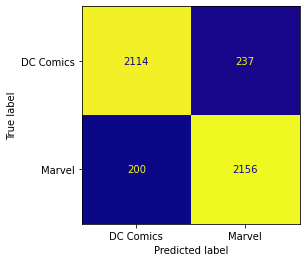

In [30]:
# CountVectorizer Multinomial Naive Bayes w/ GridSearch
preds = gs_cvec_nb.predict(X_test)  # use the best model to make predictions
cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, #plot confusion matrix
                               display_labels=['DC Comics', 'Marvel'])
disp.plot(cmap= 'plasma', colorbar = False);
plt.savefig('graphs/cm.png')

In [31]:
cm_df = pd.DataFrame(cm,
                    columns = ['Predicted DC Comics', 'Predicted Marvel'],
                    index = ['Actual DC Comics', 'Actual Marvel'])
cm_df

,Predicted DC Comics,Predicted Marvel
Actual DC Comics,2114,237
Actual Marvel,200,2156


In [32]:
# model accuracy 
accuracy_score(y_test, preds)

0.9071595496069683

For this project, I optimized for accuracy. Multinomial Naive Bayes with CountVectorizer with GridSearch has a 90.7% accuracy. 